<a href="https://colab.research.google.com/github/njones5714/Project-101/blob/main/Sentiment_Analysis_of_Characters_in_The_Office.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load and preview The Office sentiment dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/dsollberger/quartoblog/master/posts/office_sentiment/office_sentiment.csv'

df = pd.read_csv(url)

df.head()

,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...,7.6,3706,2005-03-24,0.285714,0.134552,2.15
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So...",7.6,3706,2005-03-24,0.000000,0.461880,0.00
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...,7.6,3706,2005-03-24,0.428571,0.603738,0.50
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah.",7.6,3706,2005-03-24,0.000000,0.244949,0.00
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done.",7.6,3706,2005-03-24,0.400000,0.000000,1.60


In [2]:
# Clean column names for consistency
# Convert air_date to datetime format
# Verify data types and check for missing valuesdf.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df['air_date'] = pd.to_datetime(df['air_date'])
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55130 entries, 0 to 55129
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    55130 non-null  int64         
 1   season                   55130 non-null  int64         
 2   episode                  55130 non-null  int64         
 3   episode_name             55130 non-null  object        
 4   director                 55130 non-null  object        
 5   writer                   55130 non-null  object        
 6   character                55130 non-null  object        
 7   text                     54753 non-null  object        
 8   text_w_direction         55125 non-null  object        
 9   imdb_rating              55130 non-null  float64       
 10  total_votes              55130 non-null  int64         
 11  air_date                 55130 non-null  datetime64[ns]
 12  sentimentAnalysis_score  51718 n

,0
index,0
season,0
episode,0
episode_name,0
director,0
writer,0
character,0
text,377
text_w_direction,5
imdb_rating,0


In [3]:
# Filter dataset to only include dialogue from main characters
main_characters = ['Michael', 'Dwight', 'Jim', 'Pam', 'Angela', 'Kevin', 'Oscar', 'Stanley']
df_main =df[df['character'].isin(main_characters)]

/tmp/ipython-input-2415348365.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_main, palette='pastel', x='character', y='sentimentAnalysis_score')


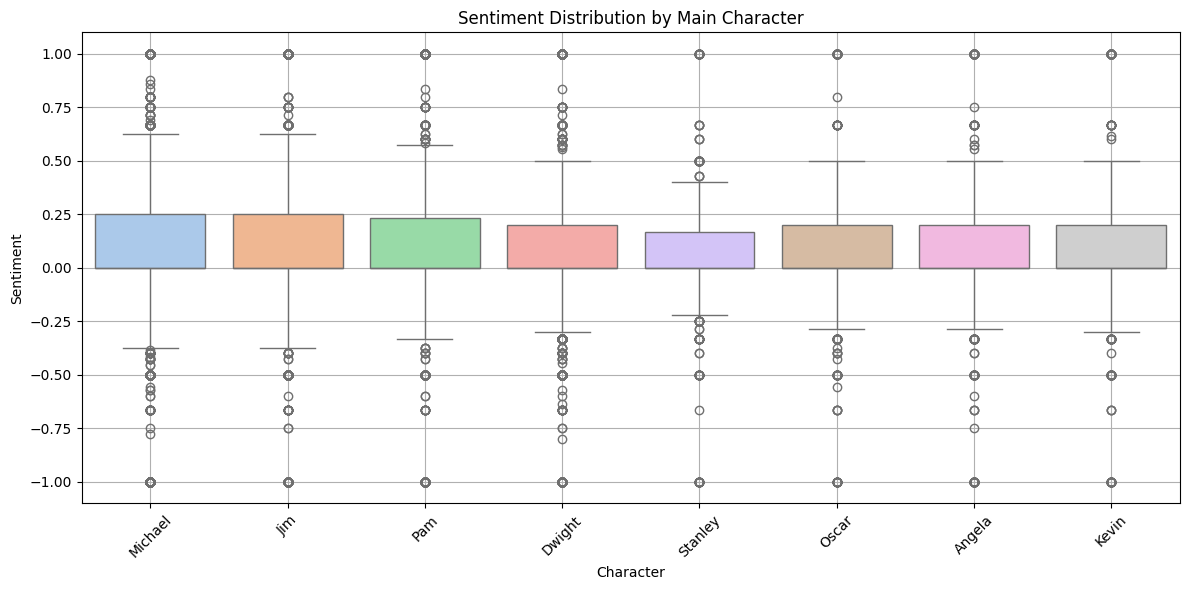

In [4]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_main, palette='pastel', x='character', y='sentimentAnalysis_score')
plt.title('Sentiment Distribution by Main Character')
plt.xlabel('Character')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

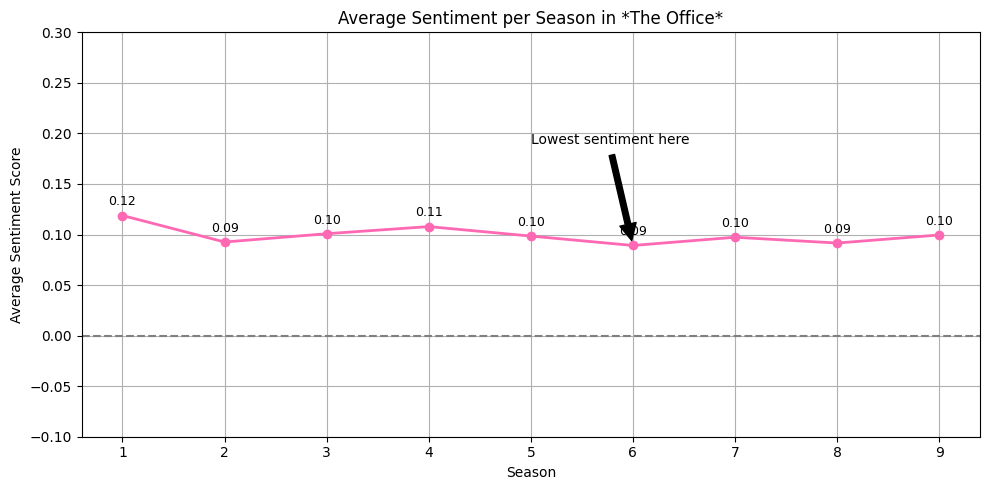

In [5]:
season_sentiment = df.groupby('season')['sentimentAnalysis_score'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(season_sentiment['season'], season_sentiment['sentimentAnalysis_score'],
         marker='o', color='hotpink', linewidth=2)
plt.axhline(0, linestyle='--', color='gray')
plt.title('Average Sentiment per Season in *The Office*')
plt.xlabel('Season')
plt.ylabel('Average Sentiment Score')
plt.ylim(-0.1, 0.3)
plt.grid(True)

# Add exact values on each data point
for i, row in season_sentiment.iterrows():
    plt.text(row['season'], row['sentimentAnalysis_score'] + 0.01,
             f"{row['sentimentAnalysis_score']:.2f}",
             ha='center', fontsize=9, color='black')

# Annotation for the lowest sentiment
lowest_season = season_sentiment.loc[season_sentiment['sentimentAnalysis_score'].idxmin()]
plt.annotate('Lowest sentiment here',
             xy=(lowest_season['season'], lowest_season['sentimentAnalysis_score']),
             xytext=(lowest_season['season'] - 1, lowest_season['sentimentAnalysis_score'] + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()

In [6]:
from scipy.stats import ttest_ind

# Define the two groups
group_positive = df[df['character'].isin(['Michael', 'Jim'])]['sentimentAnalysis_score'].dropna()
group_negative = df[df['character'].isin(['Dwight', 'Stanley', 'Angela'])]['sentimentAnalysis_score'].dropna()

# Run an independent two-sample t-test
t_stat, p_value = ttest_ind(group_positive, group_negative, equal_var=False)  # Welch's t-test

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 9.258085245975483
P-value: 2.321394490433032e-20


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with missing sentiment or text
df_model = df[['text', 'sentimentAnalysis_score']].dropna()

# Split into features and target
X = df_model['text']
y = df_model['sentimentAnalysis_score']

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.034828104377376726
R-squared Score: 0.6461506012160056


In [13]:
import numpy as np

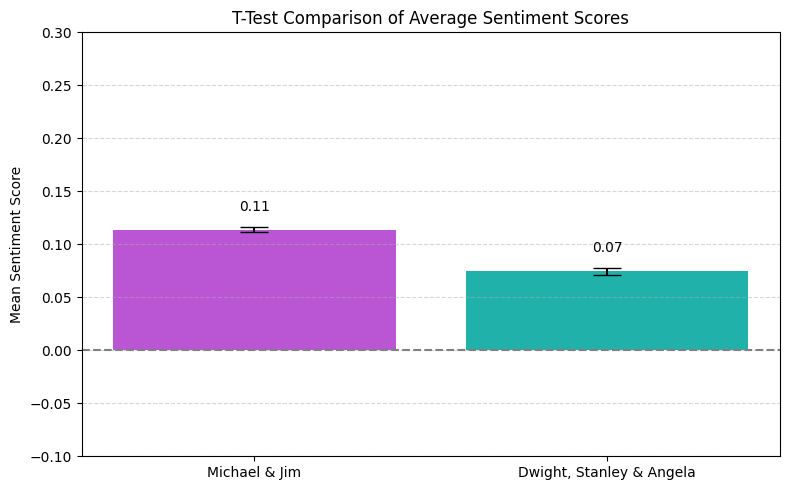

In [14]:
# Define character groups
group_positive = ['Michael', 'Jim']
group_negative = ['Dwight', 'Stanley', 'Angela']

# Get sentiment scores for both groups
group_pos_data = df[df['character'].isin(group_positive)]['sentimentAnalysis_score']
group_neg_data = df[df['character'].isin(group_negative)]['sentimentAnalysis_score']

# Calculate means and standard errors
labels = ['Michael & Jim', 'Dwight, Stanley & Angela']
means = [group_pos_data.mean(), group_neg_data.mean()]
errors = [
    group_pos_data.std(ddof=1) / np.sqrt(len(group_pos_data)),
    group_neg_data.std(ddof=1) / np.sqrt(len(group_neg_data))
]

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, means, yerr=errors, capsize=10, color=['mediumorchid', 'lightseagreen'])

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.015, f'{yval:.2f}', ha='center', va='bottom')

# Style the plot
plt.axhline(0, color='gray', linestyle='--')
plt.title('T-Test Comparison of Average Sentiment Scores')
plt.ylabel('Mean Sentiment Score')
plt.ylim(-0.1, 0.3)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()